Lets do some Data Analytics on Zomato's DataSet

First we have to import libraries that we have to use in our project 

In [176]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")

In [177]:
# Load DataSet

df=pd.read_csv("Indian-Resturants.csv")

In [178]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [179]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [181]:
df.isna().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [182]:
df.duplicated().sum()

151527

In [183]:
df.drop_duplicates(inplace=True)

In [184]:
df.shape

(60417, 26)

In [185]:
df.isna().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 47869
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1070
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          19
delivery                    0
takeaway                    0
dtype: int64

In [186]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,['Dessert Parlour'],https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,...,1,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1,0.0,1,-1
211925,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211926,18019952,Geeta lodge,['Casual Dining'],https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,...,1,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1


In [187]:
df.isna().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 47869
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1070
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          19
delivery                    0
takeaway                    0
dtype: int64

In [188]:
df.address=df.address.fillna("Unknown")

In [189]:
df.cuisines=df.cuisines.fillna("Unknown")

In [190]:
df.opentable_support=df.opentable_support.fillna(df.opentable_support.mean())

In [191]:
df.zipcode=df.zipcode.fillna("unknown")

In [192]:
a=df.timings.mode()

In [193]:
a

0    11 AM to 11 PM
Name: timings, dtype: object

In [194]:
df.timings=df.timings.fillna("a")

In [195]:
df.isna().sum()

res_id                  0
name                    0
establishment           0
url                     0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
zipcode                 0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64

# PLOTTING HORIZONTAL BAR CHATS (MULTICOLOR)

In [196]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,['Dessert Parlour'],https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,...,1,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1,0.0,1,-1
211925,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211926,18019952,Geeta lodge,['Casual Dining'],https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,...,1,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1


In [197]:
px.bar(x=df.name.head(20),y=df.average_cost_for_two.head(20),color=df.city.head(20),text=df.aggregate_rating.head(20),template="plotly_dark")

Average Cost for two people in the best resturant of the city Agra that is Pinch Of Spices with the Aggregate ratings of 4.6  is Rs1600 and cost of two people in least rated resturant of Agra that is Yadav Dhaba Purana with the ratings of 4.1 is Rs 300 only

In [198]:
px.bar(x=df.name.tail(20),y=df.average_cost_for_two.tail(20),color=df.city.tail(20),text=df.aggregate_rating.tail(20),template="plotly_dark")

 In Vadodara city average cost of meal for 2 people is Rs 700 in the best resturant that is The Grand Thakar with the ratings of 4 and for average cost for 2 people in least rated resturant that is Shree Janta Ice Cream with the ratings of 2.9  is Rs 200 only   

# Using Groupby, Apply, and Unique Functions

First we use Groupby 

In [199]:
df.groupby(["name","city","cuisines","rating_text"])["average_cost_for_two"].unique().reset_index()

,name,city,cuisines,rating_text,average_cost_for_two
0,# Wednesday,Kanpur,"Fast Food, Chinese, North Indian",Good,[250]
1,"#1, Culinary Avenue - The Red Maple",Indore,"North Indian, Chinese, Continental",Good,[1500]
2,#788 Avenue,Hyderabad,"Continental, Italian, North Indian",Good,[1900]
3,#BC,Jaipur,"North Indian, Continental, Finger Food",Very Good,[2000]
4,#BEiR,Bangalore,"Finger Food, Continental, Mexican, Burger",Very Good,[1100]
...,...,...,...,...,...
51528,Food Street - Veg,Kota,Fast Food,Average,[250]
51529,ट 4 Tasty,Goa,Street Food,Good,[300]
51530,द Vege टेबल,Pune,"North Indian, Continental, Italian",Very Good,[1000]
51531,स्पेस Bar,Pune,"North Indian, Chinese, Continental",Very Good,[1700]


By using Groupby method we can see Name of resturant ,City in which resturant is located , Cuisine resturant is offering their ratings and average cost of 2 people 

Apply method
* we are making new column in which we are giving 5% discount on average cost of two people 

In [200]:
df.insert(21,"Discount",df.average_cost_for_two*5/100)

In [201]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,currency,highlights,aggregate_rating,rating_text,Discount,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,35.0,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,30.0,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,15.0,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,15.0,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,50.0,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,['Dessert Parlour'],https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,...,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,10.0,4,1,0.0,1,-1
211925,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,35.0,111,38,0.0,-1,-1
211926,18019952,Geeta lodge,['Casual Dining'],https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,...,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,12.5,207,14,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,15.0,187,40,0.0,1,-1


# Removing Outliers

<Axes: >

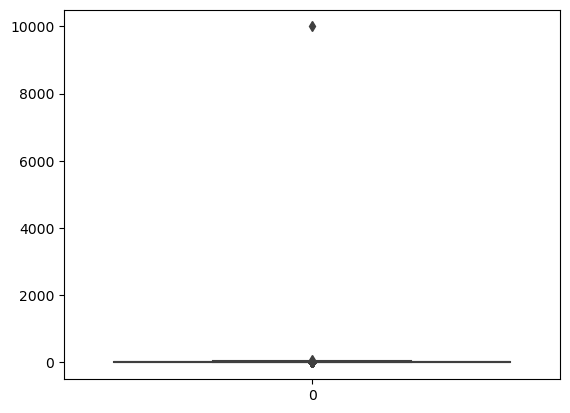

In [202]:
sns.boxplot(df.latitude)

In [203]:
Q1,Q3=df.latitude.quantile([0.25,0.75])

In [204]:
Q1,Q3

(16.324755463800003, 26.744388798800003)

In [205]:
IQR=Q3-Q1

In [206]:
IQR

10.419633335

In [207]:
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

In [208]:
UL,LL

(42.3738388013, 0.695305461300002)

In [209]:
len(df[df.latitude<LL])

951

In [210]:
len(df[df.latitude>UL])

2

In [211]:
df.latitude=np.where(df.latitude<LL,LL,df.latitude)
df.latitude=np.where(df.latitude>UL,UL,df.latitude)

<Axes: >

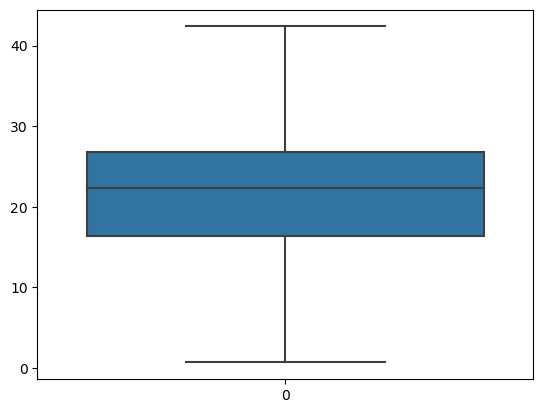

In [212]:
sns.boxplot(df.latitude)

<Axes: >

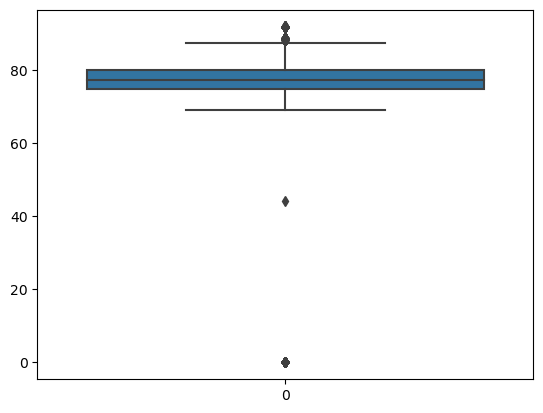

In [213]:
sns.boxplot(df.longitude)

In [214]:
Q1,Q3=df.longitude.quantile([0.25,0.75])

In [215]:
Q1,Q3

(74.65402912350001, 79.9281898141)

In [216]:
IQR=Q3-Q1

In [217]:
IQR

5.2741606905999845

In [218]:
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

In [219]:
UL,LL

(87.83943084999997, 66.74278808760003)

In [220]:
len(df[df.longitude>UL])

2938

In [221]:
len(df[df.longitude<LL])

957

In [222]:
df.longitude=np.where(df.longitude>UL,UL,df.longitude)
df.longitude=np.where(df.longitude<LL,LL,df.longitude)

<Axes: >

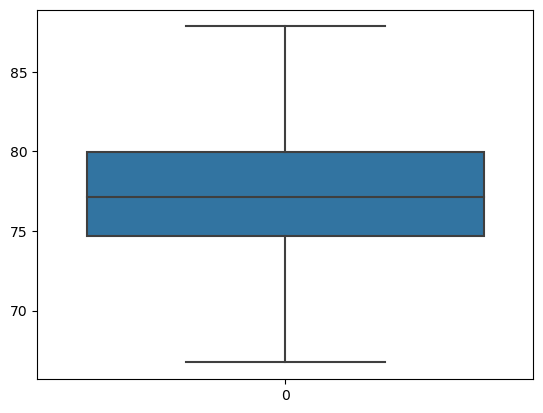

In [223]:
sns.boxplot(df.longitude)

<Axes: >

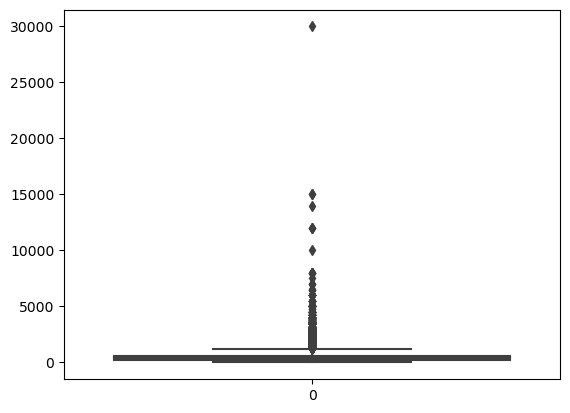

In [224]:
sns.boxplot(df.average_cost_for_two)

In [225]:
Q1,Q3=df.average_cost_for_two.quantile([0.25,0.75])

In [226]:
Q1,Q3

(200.0, 600.0)

In [227]:
IQR=Q3-Q1

In [228]:
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

In [229]:
UL,LL

(1200.0, -400.0)

In [230]:
len(df[df.average_cost_for_two>UL])

5291

In [231]:
len(df[df.average_cost_for_two<LL])

0

In [232]:
df.average_cost_for_two=np.where(df.average_cost_for_two>UL,UL,df.average_cost_for_two)

<Axes: >

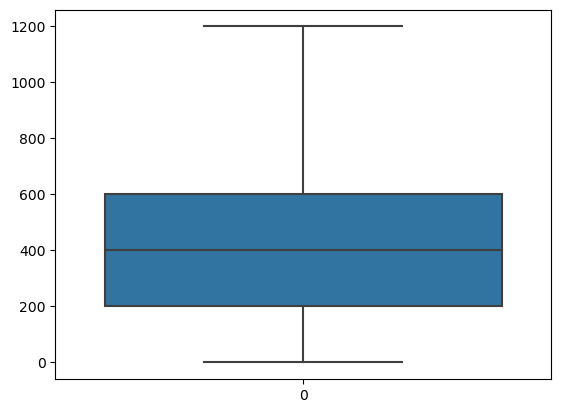

In [233]:
sns.boxplot(df.average_cost_for_two)

In [234]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'Discount', 'votes', 'photo_count', 'opentable_support',
       'delivery', 'takeaway'],
      dtype='object')

<Axes: >

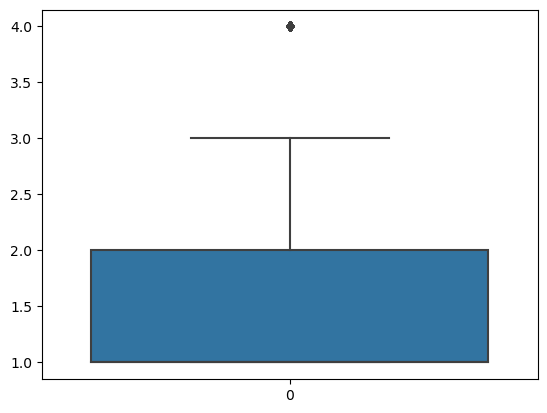

In [235]:
sns.boxplot(df.price_range)

In [236]:
Q1,Q3=df.price_range.quantile([0.25,0.75])

In [237]:
    Q1,Q3

(1.0, 2.0)

In [238]:
IQR=Q3-Q1

In [239]:
IQR

1.0

In [240]:
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

In [241]:
UL,LL

(3.5, -0.5)

In [242]:
len(df[df.price_range>UL])

3058

In [243]:
len(df[df.price_range<LL])

0

In [244]:
df.price_range=np.where(df.price_range>UL,UL,df.price_range)

<Axes: >

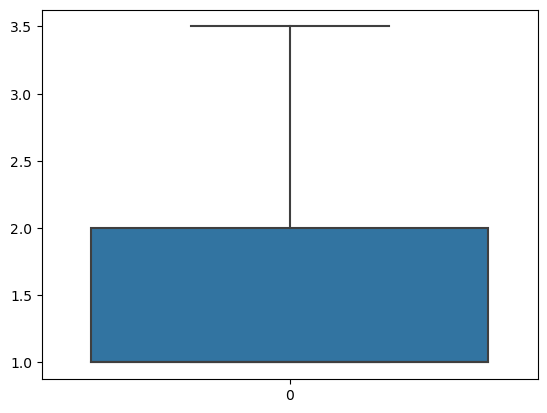

In [245]:
sns.boxplot(df.price_range)

<Axes: >

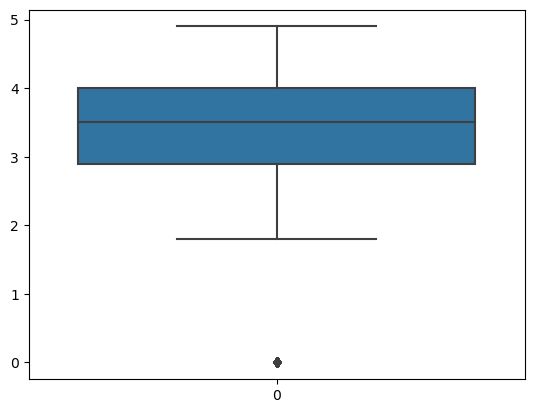

In [246]:
sns.boxplot(df.aggregate_rating)

In [247]:
Q1,Q3=df.aggregate_rating.quantile([0.25,0.75])

In [248]:
Q1,Q3

(2.9, 4.0)

In [249]:
IQR=Q3-Q1

In [250]:
IQR

1.1

In [251]:
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

In [252]:
len(df[df.aggregate_rating>UL])

0

In [253]:
len(df[df.aggregate_rating<LL])

10159

In [254]:
df.aggregate_rating=np.where(df.aggregate_rating<LL,LL,df.aggregate_rating)

<Axes: >

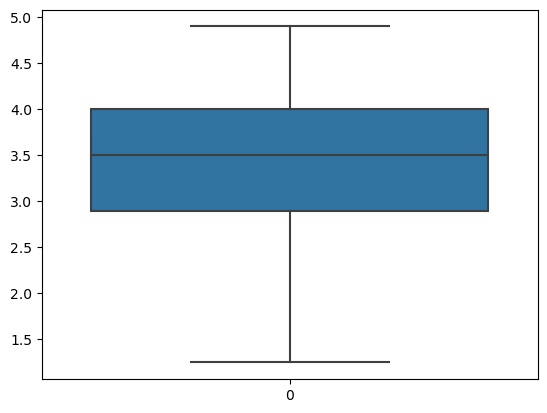

In [255]:
sns.boxplot(df.aggregate_rating)

<Axes: >

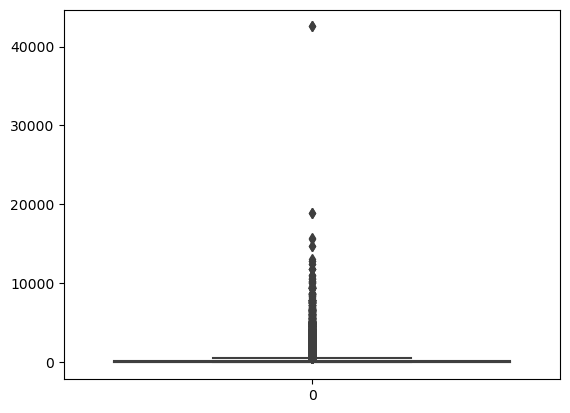

In [256]:
sns.boxplot(df.votes)

In [257]:
Q1,Q3=df.votes.quantile([0.25,0.75])

In [258]:
Q1,Q3

(7.0, 207.0)

In [259]:
IQR=Q3-Q1

In [260]:
IQR

200.0

In [261]:
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

In [262]:
UL,LL

(507.0, -293.0)

In [263]:
len(df[df.votes>UL])

7962

In [264]:
len(df[df.votes<LL])

0

In [265]:
df.votes=np.where(df.votes>UL,UL,df.votes)

<Axes: >

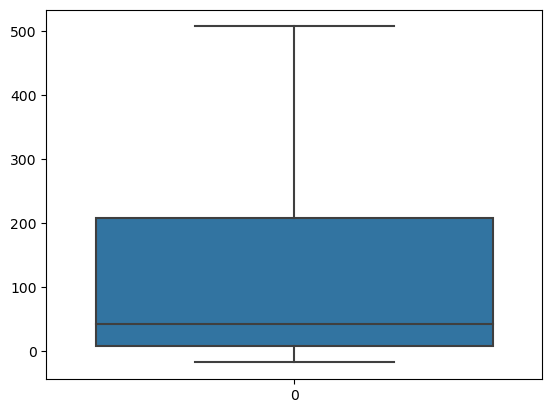

In [266]:
sns.boxplot(df.votes)

<Axes: >

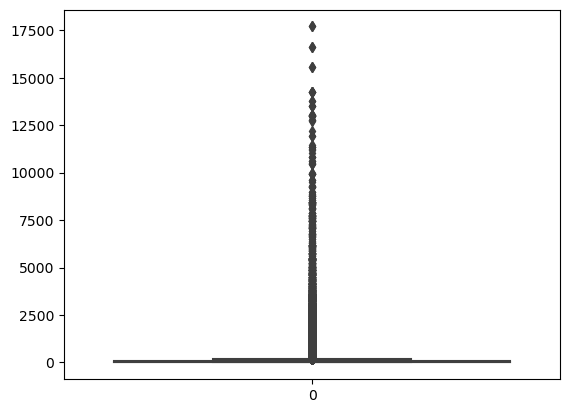

In [267]:
sns.boxplot(df.photo_count)

In [268]:
Q1,Q3=df.photo_count.quantile([0.25,0.75])

In [269]:
Q1,Q3

(1.0, 82.0)

In [270]:
IQR=Q3-Q1

In [271]:
IQR

81.0

In [272]:
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

In [273]:
UL,LL

(203.5, -120.5)

In [274]:
len(df[df.photo_count>UL])

9523

In [275]:
len(df[df.photo_count<LL])

0

In [276]:
df.photo_count=np.where(df.photo_count>UL,UL,df.photo_count)

<Axes: >

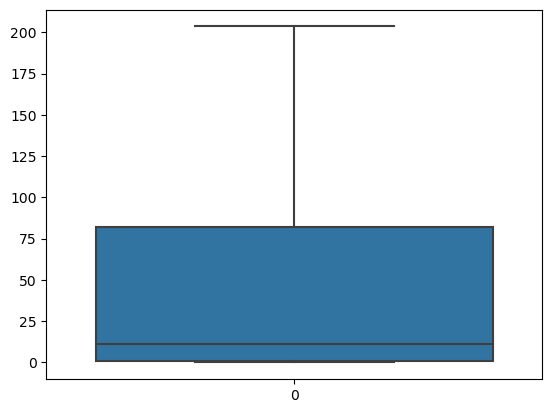

In [277]:
sns.boxplot(df.photo_count)

# Scatter Plot

<Axes: xlabel='aggregate_rating', ylabel='average_cost_for_two'>

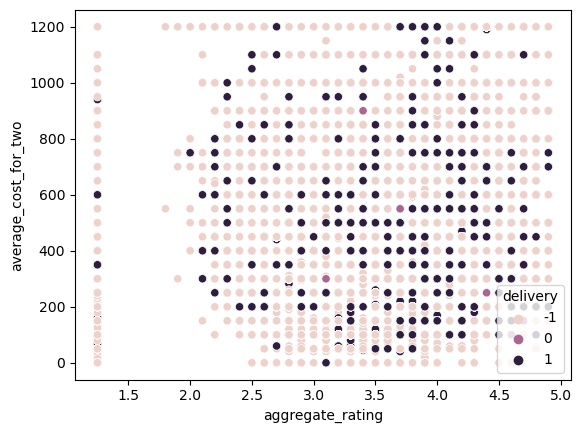

In [278]:
sns.scatterplot(x=df.aggregate_rating,y=df.average_cost_for_two,hue=df.delivery)

<Axes: xlabel='city', ylabel='average_cost_for_two'>

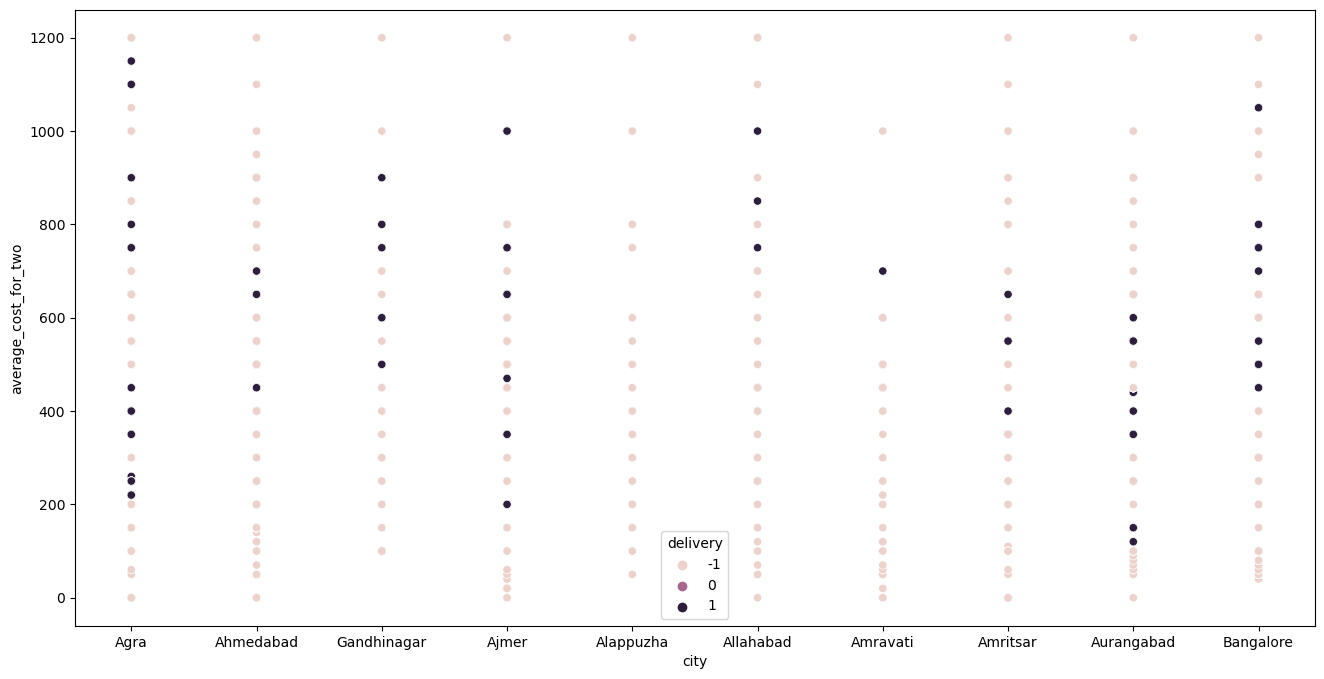

In [279]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=df.city.head(6000),y=df.average_cost_for_two.head(6000),hue=df.delivery.head(6000))

# Word Cloud

In [280]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [281]:
from wordcloud import WordCloud

In [282]:
text = "ZOMATO"
wordcloud = WordCloud().generate(text)

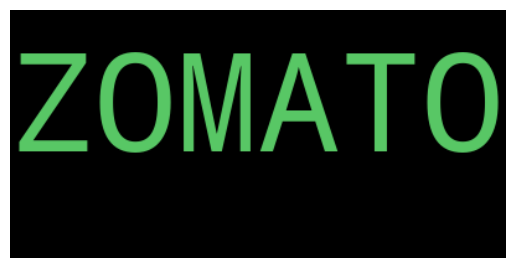

In [283]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# DENSITY PLOT

<Axes: xlabel='average_cost_for_two', ylabel='Density'>

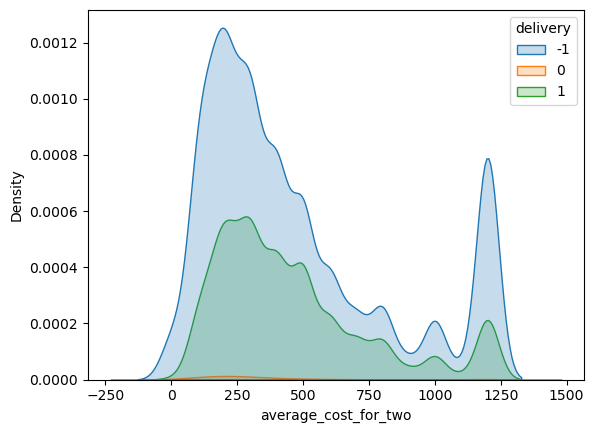

In [284]:
sns.kdeplot(x=df.average_cost_for_two,hue=df.delivery,fill=True,palette="tab10")

# DIST PLOT

<Axes: xlabel='average_cost_for_two', ylabel='Density'>

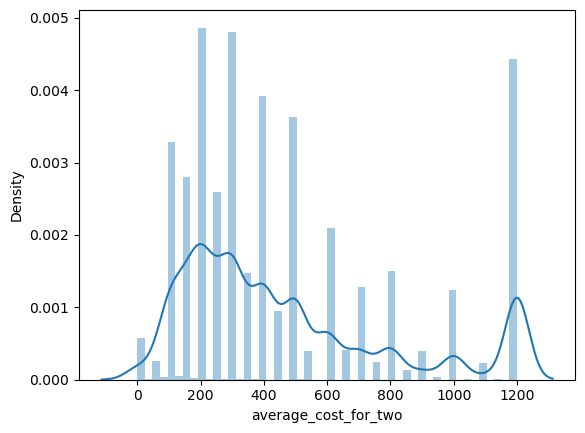

In [285]:
sns.distplot(df.average_cost_for_two)

# BAR CHART

<Axes: xlabel='name', ylabel='average_cost_for_two'>

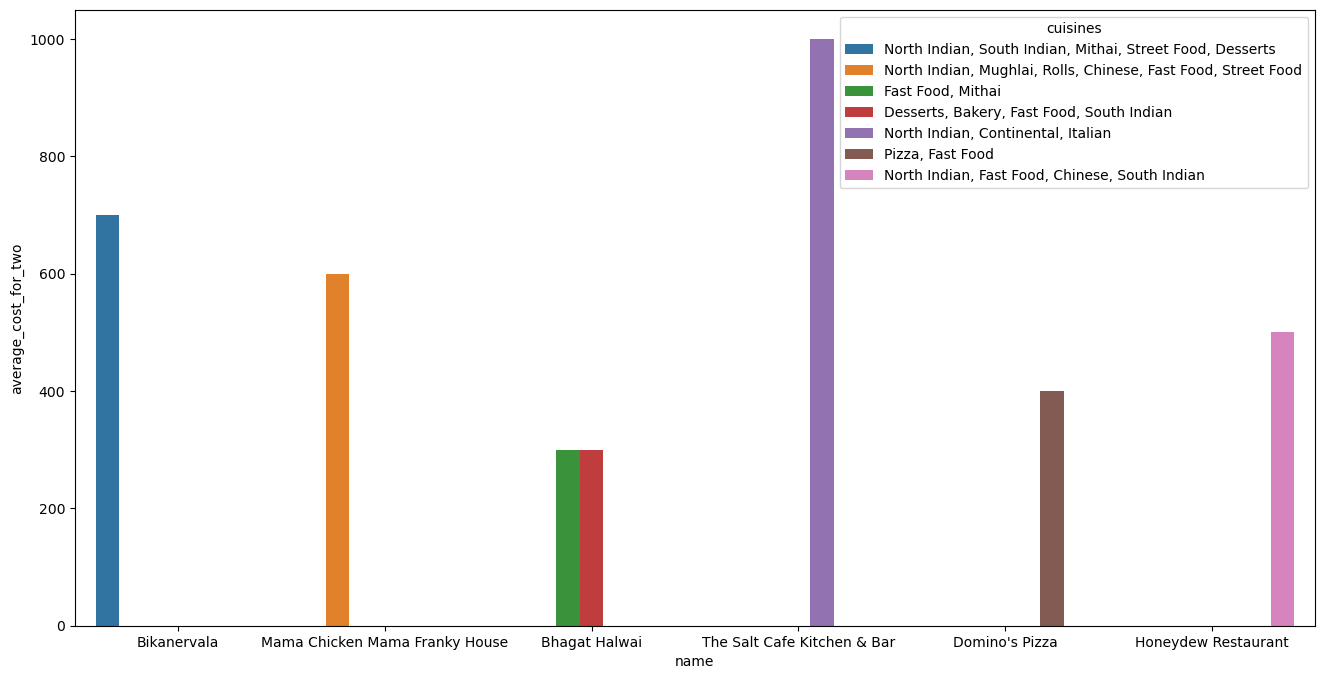

In [286]:
plt.figure(figsize=(16,8))

sns.barplot(x=df.name.head(8),y=df.average_cost_for_two.head(8),hue=df.cuisines.head(8))

<Axes: xlabel='name', ylabel='Count'>

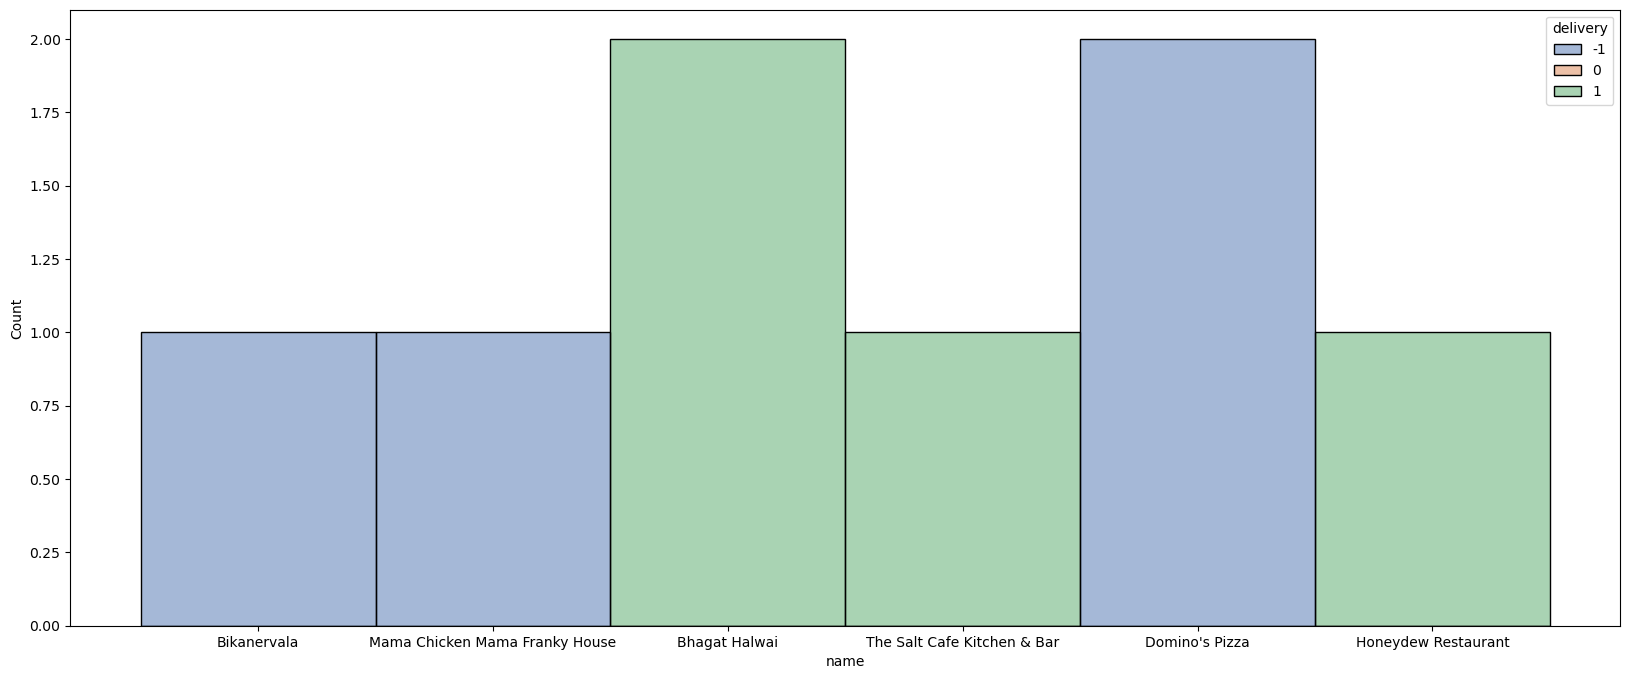

In [287]:

plt.figure(figsize=(20,8))
sns.histplot(x=df.name.head(8),hue=df.delivery,palette="deep")

# PIE CHART

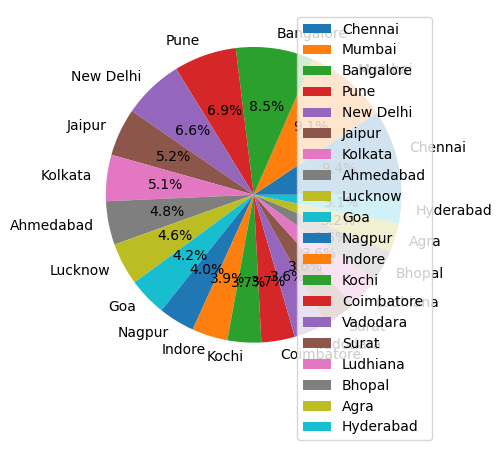

In [288]:
plt.pie(df.city.value_counts().head(20),labels=df.city.value_counts().head(20).index,autopct="%1.1f%%")
plt.legend()

Chennai has most number of resturants

# BASIC STATISTICS WITH DATA 

Calculate and visualize the average rating of restaurants

In [289]:
df.aggregate_rating.median()

3.5

In [290]:
average_rating=df[df.aggregate_rating==3.5]

In [291]:
average_rating

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,currency,highlights,aggregate_rating,rating_text,Discount,votes,photo_count,opentable_support,delivery,takeaway
15,3400611,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-kaml...,"Ground & First Floor, City Mall, Balkeshwar Co...",Agra,34,Kamla Nagar,27.212943,78.026549,...,Rs.,"['Credit Card', 'Dinner', 'Debit Card', 'Takea...",3.5,Good,20.0,490.0,17.0,0.0,-1,-1
77,3400385,Sattolala Food Court,['Quick Bites'],https://www.zomato.com/agra/sattolala-food-cou...,"6, M.I.G,, New Shahganj Rd, Kothi Meena Bazaar...",Agra,34,Shahganj,27.178337,77.989000,...,Rs.,"['Takeaway Available', 'Credit Card', 'Debit C...",3.5,Good,10.0,215.0,20.0,0.0,1,-1
79,3400029,Capri Restaurant,['Casual Dining'],https://www.zomato.com/agra/capri-restaurant-c...,"Shop no.6-7,upadhyay market,hari parvat,agra,u...",Agra,34,Civil Lines,27.196595,78.000893,...,Rs.,"['Credit Card', 'Takeaway Available', 'Dinner'...",3.5,Good,42.5,232.0,60.0,0.0,1,-1
127,3400171,Rendezvous - Hotel Howard Plaza,['Fine Dining'],https://www.zomato.com/agra/rendezvous-hotel-h...,"Hotel Howard Plaza, Fatehabad Road, Tajganj, Agra",Agra,34,"Hotel Howard Plaza, Tajganj",27.162926,78.036835,...,Rs.,"['Dinner', 'Takeaway Available', 'Credit Card'...",3.5,Good,100.0,13.0,21.0,0.0,-1,-1
225,3401672,Laxman Momo's Corner,['Quick Bites'],https://www.zomato.com/agra/laxman-momos-corne...,"Rajpur Chungi, Tajganj, Agra",Agra,34,Tajganj,27.150113,78.035564,...,Rs.,"['Dinner', 'Takeaway Available', 'Cash']",3.5,Good,5.0,35.0,2.0,0.0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211075,18754495,Shaan-E-Punjab,['Quick Bites'],https://www.zomato.com/vadodara/shaan-e-punjab...,"C 20, Dayal Nagar Society, Beside Modi Medical...",Vadodara,32,Karelibaug,22.310683,73.224911,...,Rs.,"['Lunch', 'Delivery', 'Breakfast', 'Dinner', '...",3.5,Good,20.0,72.0,6.0,0.0,-1,-1
211097,3202271,The Square Meal- Ginger Hotel RCR,['Casual Dining'],https://www.zomato.com/vadodara/the-square-mea...,"Ginger Hotel, Near Natubhai Circle, Race Cours...",Vadodara,32,Vadiwadi,22.308823,73.159515,...,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Brea...",3.5,Good,30.0,36.0,36.0,0.0,1,-1
211705,18878732,Vijay Panjabi Khana,['Quick Bites'],https://www.zomato.com/vadodara/vijay-panjabi-...,"GF/5, Atmiya Heights, Maneja Crossing, Makarpu...",Vadodara,32,Makarpura,22.236352,73.188811,...,Rs.,"['Dinner', 'Lunch', 'Takeaway Available', 'Cas...",3.5,Good,15.0,62.0,4.0,0.0,-1,-1
211724,3201287,Cafe 3' Trio,['Café'],https://www.zomato.com/vadodara/cafe-3-trio-ke...,"103, Vraj Residency, Above A-One Sport Saloon,...",Vadodara,32,Kendranagar,22.286610,73.233724,...,Rs.,"['Cash', 'Credit Card', 'Lunch', 'Dinner', 'Ta...",3.5,Good,22.5,87.0,44.0,0.0,-1,-1


In [292]:
average_rating.groupby(["name","city","cuisines"])["average_cost_for_two"].sum().reset_index()

,name,city,cuisines,average_cost_for_two
0,# Wednesday,Kanpur,"Fast Food, Chinese, North Indian",250.0
1,009 Restaurant,Varanasi,"Fast Food, North Indian, Chinese",500.0
2,14 Empire,Patna,"North Indian, Chinese, Fast Food",600.0
3,17th Avenue Cafe,Goa,Cafe,250.0
4,18 Degree Icecream Zone,Trichy,"Ice Cream, Desserts, Juices",150.0
...,...,...,...,...
2653,Zuma - Hampton by Hilton,Vadodara,"Thai, North Indian, Chinese, Afghan, American",1200.0
2654,ibaco,Chennai,"Ice Cream, Desserts",1400.0
2655,ibaco,Palakkad,"Desserts, Ice Cream",600.0
2656,lazeezo shawarna,Kolhapur,"Kebab, Turkish",200.0


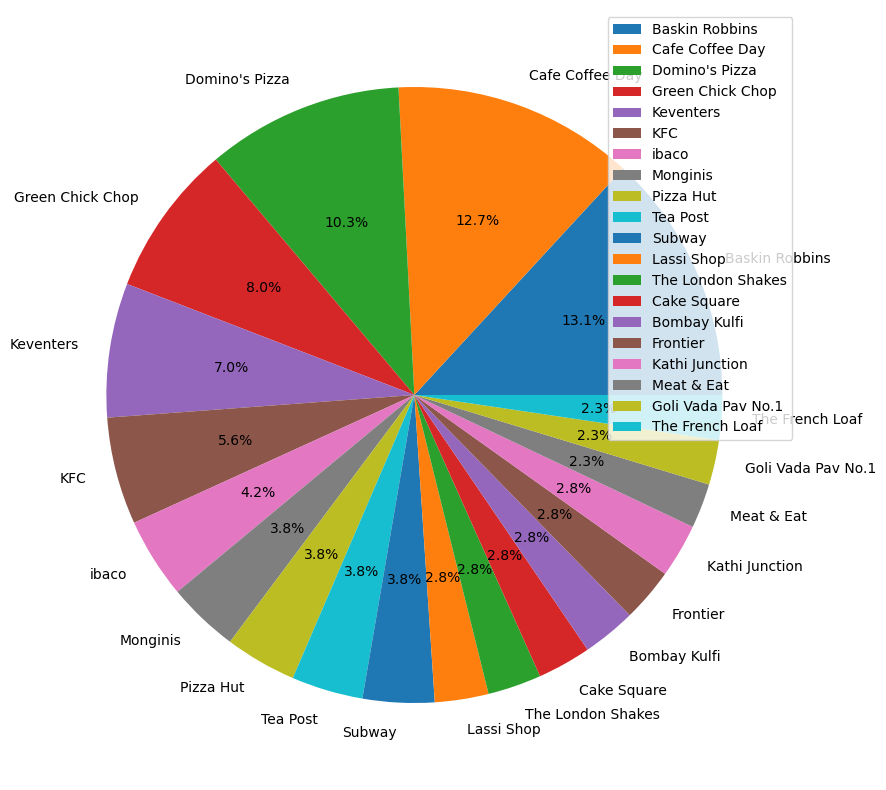

In [293]:
plt.figure(figsize=(15,10))
plt.pie(average_rating.name.value_counts().head(20),labels=average_rating.name.value_counts().head(20).index,autopct="%1.1f%%")
plt.legend()

Baskin Robbins has higest ratings 

# Distribution of restaurant ratings to understand the overall rating


In [294]:


px.bar(x=df.name.head(20),y=df.average_cost_for_two.head(20),color=df.rating_text.head(20),text=df.aggregate_rating.head(20))

<Axes: xlabel='aggregate_rating', ylabel='average_cost_for_two'>

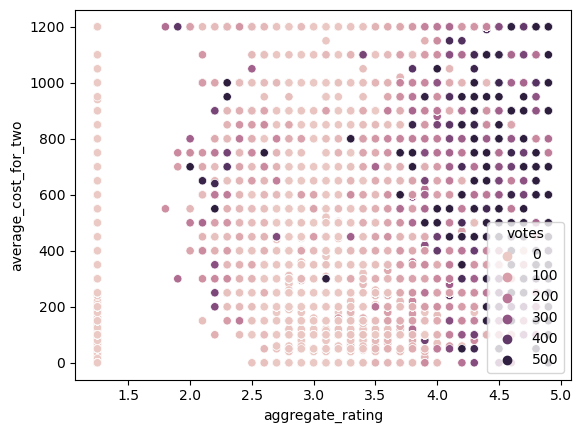

In [295]:
sns.scatterplot(x=df.aggregate_rating,y=df.average_cost_for_two,hue=df.votes)

# LOCATION ANALYSIS

In [296]:
x=df.groupby(["city"])["name"].nunique().sort_values(ascending=False)

In [297]:
x

city
Bangalore        1504
Mumbai           1474
Pune             1462
New Delhi        1271
Chennai          1271
                 ... 
Udupi              59
Howrah             49
Neemrana           26
Greater Noida      20
Nayagaon           15
Name: name, Length: 99, dtype: int64

In [298]:
a=pd.DataFrame(x).reset_index()

In [299]:
a

,city,name
0,Bangalore,1504
1,Mumbai,1474
2,Pune,1462
3,New Delhi,1271
4,Chennai,1271
...,...,...
94,Udupi,59
95,Howrah,49
96,Neemrana,26
97,Greater Noida,20


<Axes: xlabel='city', ylabel='name'>

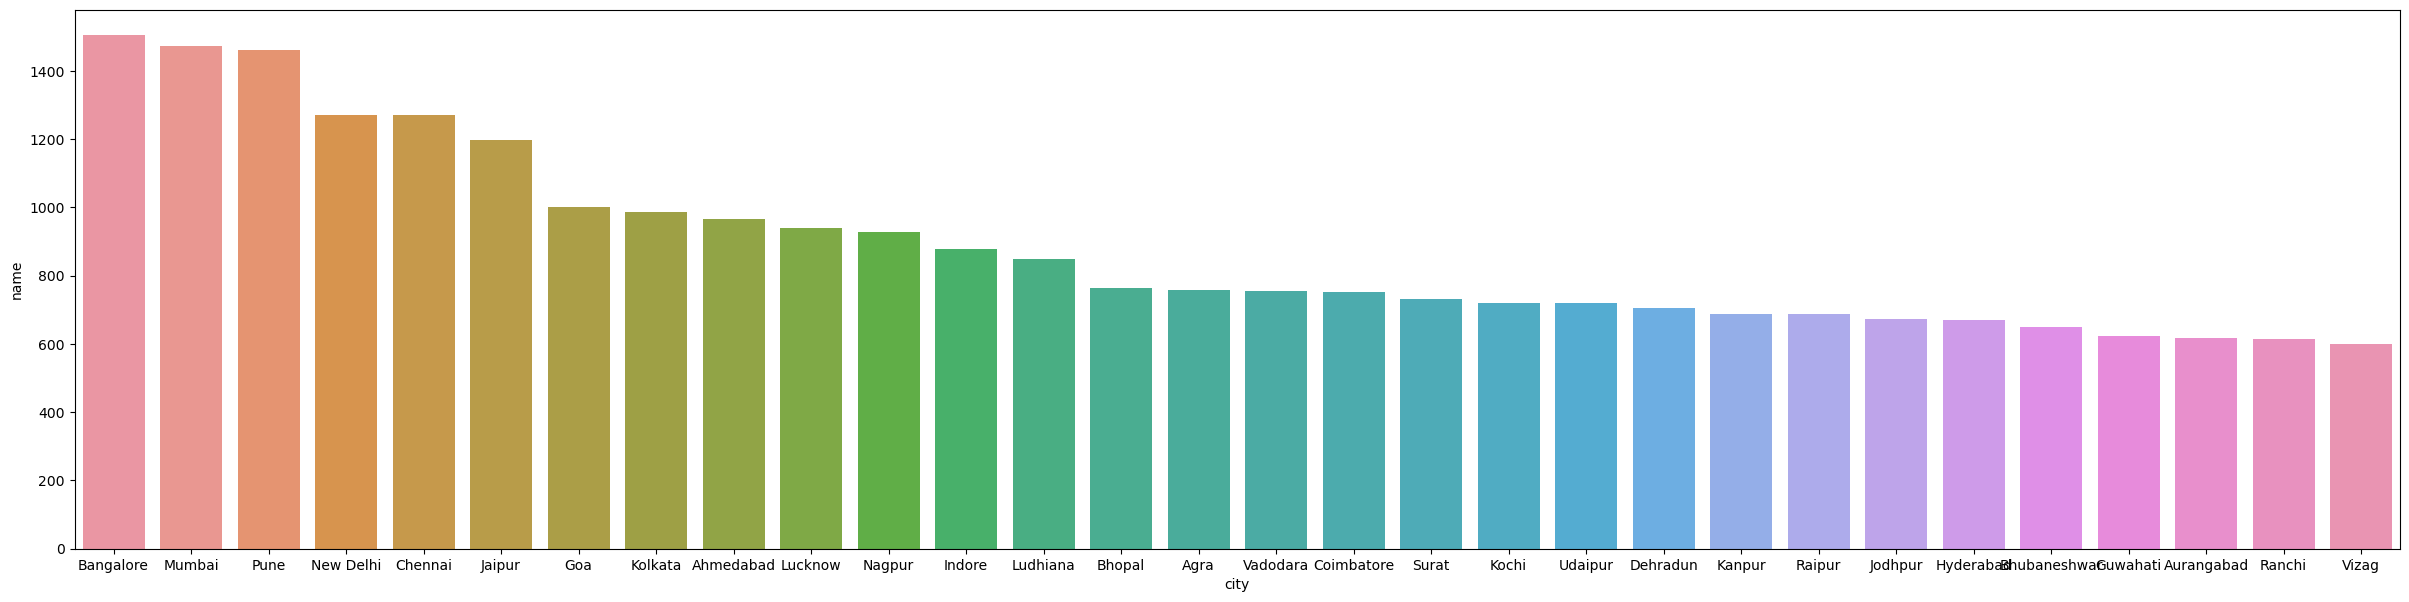

In [300]:
plt.figure(figsize=(30,7))
sns.barplot(x=a.city.head(30),y=a.name.head(30))

 Banglore has highest number of resturants

# Ratings of restruratnts according to diffrent cities 

In [301]:
ratings=df.groupby(["name","city"])["aggregate_rating"].sum().reset_index()

In [302]:
ratings.max()

name                ह-tea The Tea Hut
city                         Zirakpur
aggregate_rating               270.85
dtype: object

In [303]:
ratings.head(15)

,name,city,aggregate_rating
0,# Wednesday,Kanpur,3.50
1,"#1, Culinary Avenue - The Red Maple",Indore,3.90
2,#788 Avenue,Hyderabad,3.90
3,#BC,Jaipur,4.20
4,#BEiR,Bangalore,4.10
5,#Dilliwaala6,Puducherry,4.20
6,#Jaipur Darbar,Jaipur,3.40
7,#OFF Campus,New Delhi,4.00
8,#Selfieccino,Rajkot,3.30
9,#Underground Restro & Bar,Jaipur,3.20


<Axes: xlabel='name', ylabel='aggregate_rating'>

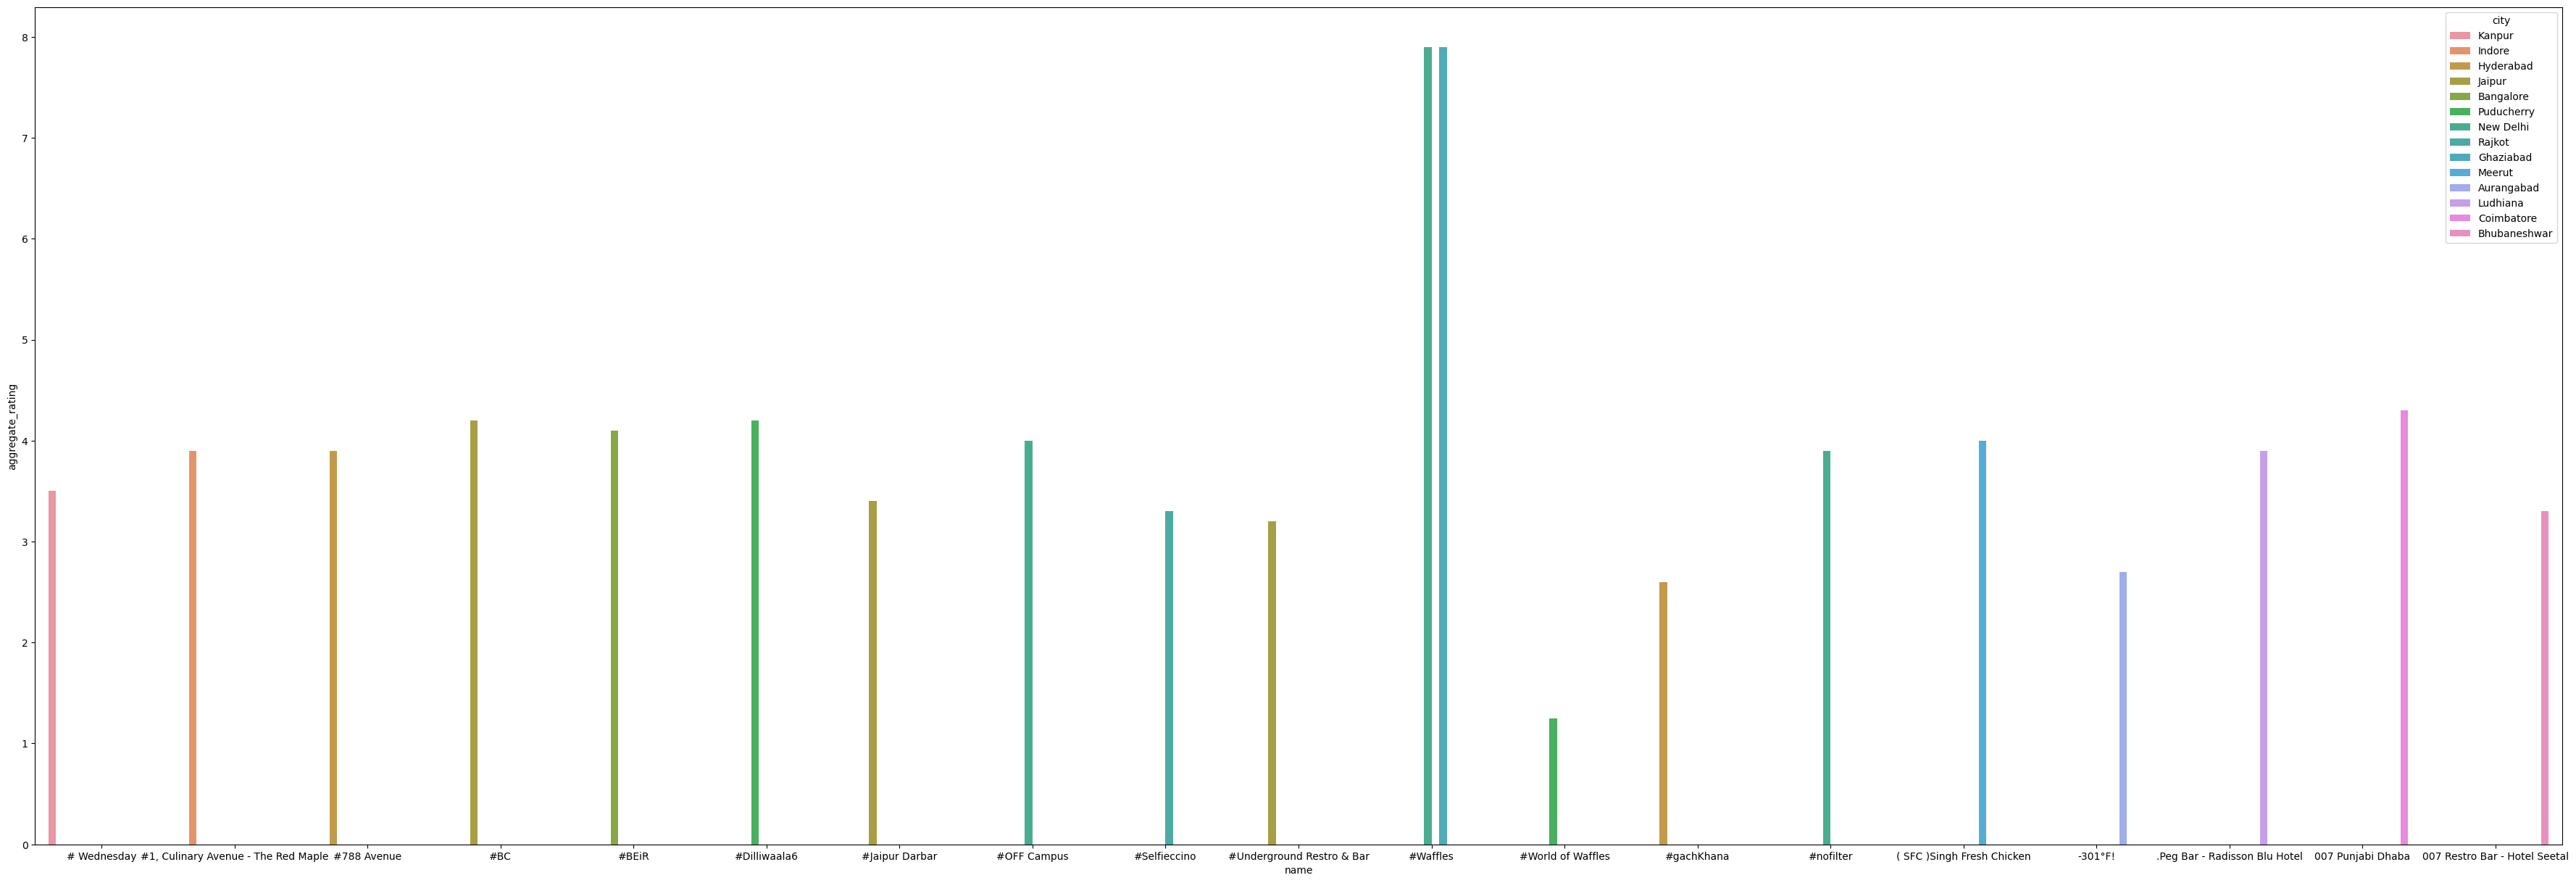

In [304]:
plt.figure(figsize=(45,15))
sns.barplot(x=ratings.name.head(20),y=ratings.aggregate_rating.head(20),hue=ratings.city.head(20))



# CUISINE ANALYSIS- The most popular cuisine under listed resturants 

In [305]:
df.cuisines.value_counts()

cuisines
North Indian                                    4587
Fast Food                                       2137
North Indian, Chinese                           1720
Bakery                                          1618
South Indian                                    1600
                                                ... 
North Indian, Fast Food, Healthy Food              1
Beverages, Healthy Food, Fast Food                 1
Fast Food, Street Food, South Indian, Bakery       1
Tibetan, Street Food                               1
North Indian, Lucknowi, Chinese                    1
Name: count, Length: 9383, dtype: int64

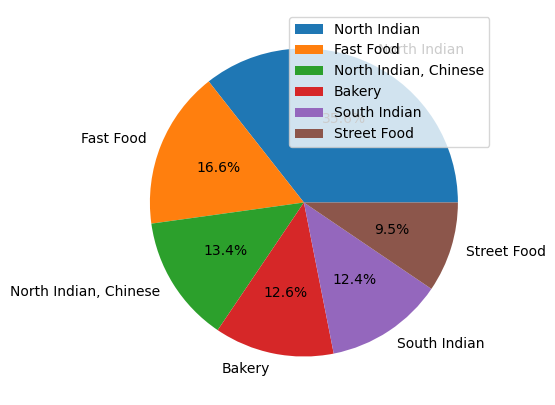

In [306]:
plt.figure(figsize=(10,5))
plt.pie(df.cuisines.value_counts().head(6),labels=df.cuisines.value_counts().head(6).index,autopct="%1.1f%%")
plt.legend()

 From the given pie chart we cam clearly see that the North Indian cuisine is most popular

# Relationship between Price , Range and Ratings

<Axes: >

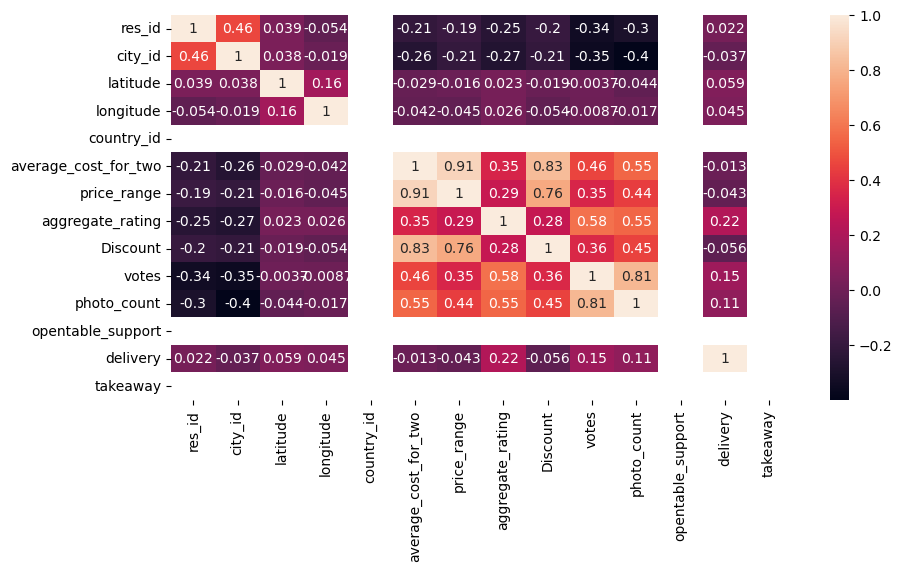

In [307]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Visualization of the average cost for two people in different price categories.


<Axes: xlabel='price_range', ylabel='average_cost_for_two'>

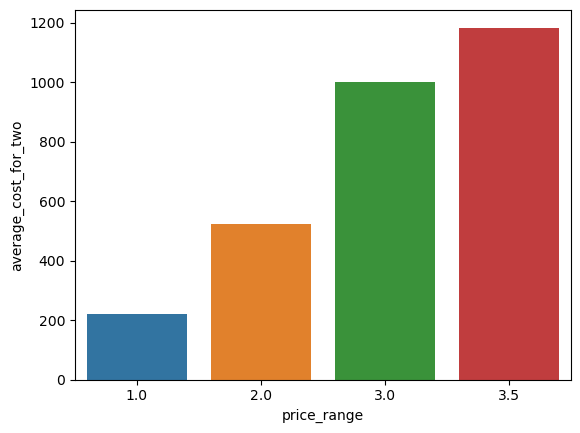

In [308]:
sns.barplot(x=df.price_range,y=df.average_cost_for_two,ci=True)

<Axes: xlabel='price_range', ylabel='average_cost_for_two'>

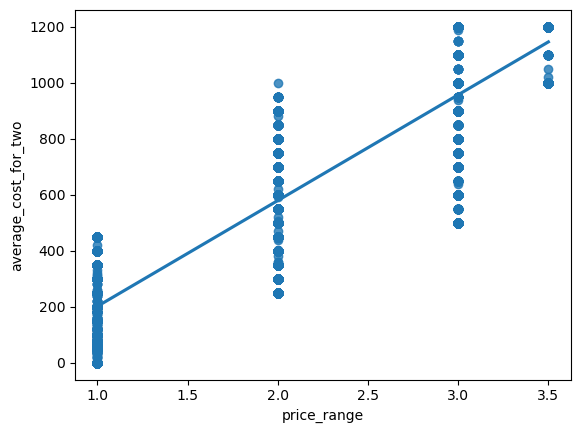

In [309]:
sns.regplot(x=df.price_range,y=df.average_cost_for_two)

# Online Order and Table Booking:

Investigation of the impact of online order availability on restaurant ratings

<Axes: xlabel='delivery', ylabel='aggregate_rating'>

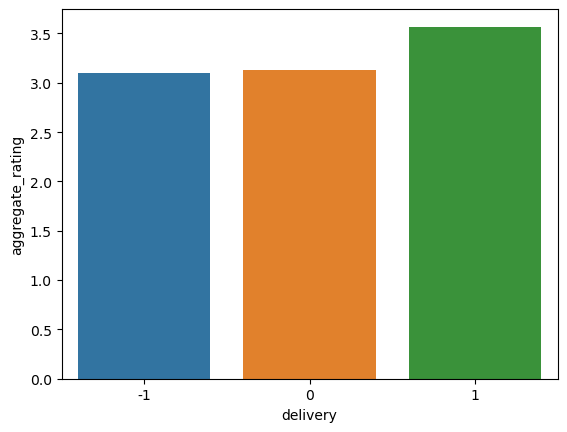

In [310]:
sns.barplot(x=df.delivery,y=df.aggregate_rating,ci=True)

The distribution of restaurants that offer table booking.

In [311]:
df.opentable_support.value_counts()

opentable_support
0.0    60417
Name: count, dtype: int64


# Top Restaurant Chains:

visualization the top restaurant chains based on the number of outlets and the ratings of top chains

In [312]:
df.name.value_counts()

name
Domino's Pizza                                       406
Cafe Coffee Day                                      323
KFC                                                  261
Subway                                               211
Keventers                                            208
                                                    ... 
Jai Bhole ki Vaishnav Bhojnalaya                       1
Shri Hari Snacks                                       1
Greeno Restaurant                                      1
The Dark Mustache ( Kathi Roll Barbeque Chicken )      1
Geeta lodge                                            1
Name: count, Length: 41100, dtype: int64

In [138]:
px.bar(x=df.name.value_counts().head(10).index,y=df.name.value_counts().head(10),text=df.name.value_counts().head(10),color=df.name.value_counts().head(10),template="plotly_dark")

# Finding average ratings 

In [139]:


df.groupby("name")["aggregate_rating"].mean().sort_values(ascending=False)

name
Villa Maya Heritage Restaurant        4.90
Zolocrust - Hotel Clarks Amer         4.90
Trio-La Patisserie                    4.90
Jumjoji - The Parsi Diner             4.90
White Charcoal - The Empresa Hotel    4.90
                                      ... 
TAPRI - The Food Stall                1.25
Buon Appetito                         1.25
Burfi Kadai                           1.25
Friend's Cafe                         1.25
Ruchiram Bhojnalaya                   1.25
Name: aggregate_rating, Length: 41100, dtype: float64

# Investigate if the presence of certain features correlates with higher ratings.


In [140]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'Discount', 'votes', 'photo_count', 'opentable_support',
       'delivery', 'takeaway'],
      dtype='object')

In [141]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,currency,highlights,aggregate_rating,rating_text,Discount,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,35.0,507.0,154.0,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,30.0,507.0,161.0,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,15.0,507.0,107.0,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,15.0,507.0,157.0,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,50.0,470.0,203.5,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,['Dessert Parlour'],https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,...,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,10.0,4.0,1.0,0.0,1,-1
211925,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,35.0,111.0,38.0,0.0,-1,-1
211926,18019952,Geeta lodge,['Casual Dining'],https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,...,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,12.5,207.0,14.0,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,15.0,187.0,40.0,0.0,1,-1


In [142]:
plt.figure(figsize=(25,5))
px.bar(x=df.establishment.head(50),y=df.aggregate_rating.head(50),text=df.delivery.head(50),color=df.timings.head(50))

<Figure size 2500x500 with 0 Axes>

# Seasonal Trends:

# Visualization of the distribution of ratings during different times of the year

In [143]:
df.groupby("timings")["aggregate_rating"].sum()

timings
(Mon),12noon – 12midnight (Tue-Sun)                                             3.40
(Mon, Tue, Fri), 8am – 12midnight (Wed, Sat, Sun), 8:40am – 11:55pm (Thu)       7.40
(Mon, Tue, Thu, Fri, Sat, Sun), 12:5AM – 12midnight (Wed)                       7.80
(Mon-Sat),11am – 12:5pm (Sun)                                                   1.25
(Mon-Sun)                                                                      35.45
                                                                              ...   
Mon-Tue, Thu-Sun (11 AM to 11:59 PM), Wed (11 AM to 11:55 PM)                   7.40
Mon-Tue, Thu-Sun (Closed), Wed (8 AM to 8:15 AM)                                3.80
Mon-Wed (11 AM to 10 PM), Thu-Sun (Closed)                                      3.10
Mon-Wed, Fri-Sun (11 AM to 11 PM), Thu (Closed)                                 2.60
a                                                                            2537.65
Name: aggregate_rating, Length: 7741, dtype: float64

<Axes: xlabel='name', ylabel='aggregate_rating'>

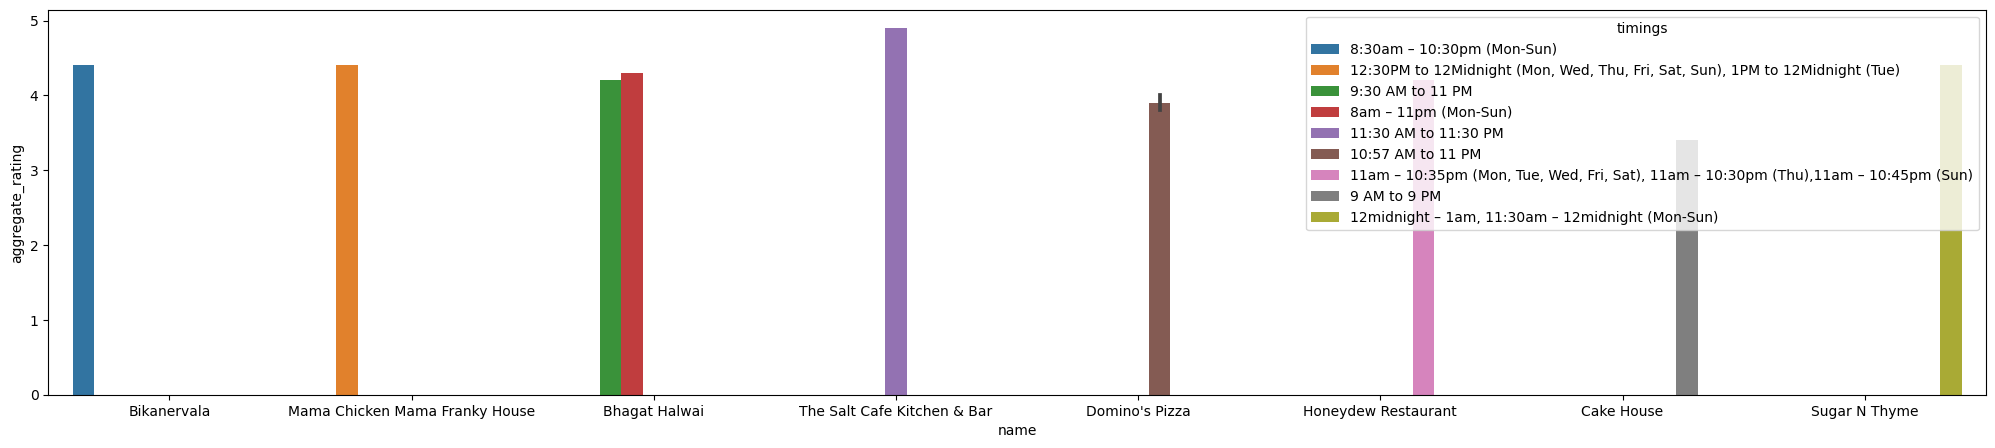

In [144]:
plt.figure(figsize=(25,5))
sns.barplot(x=df.name.head(10),y=df.aggregate_rating.head(10),hue=df.timings.head(10))

# Votes of the localities

<Axes: xlabel='votes', ylabel='locality'>

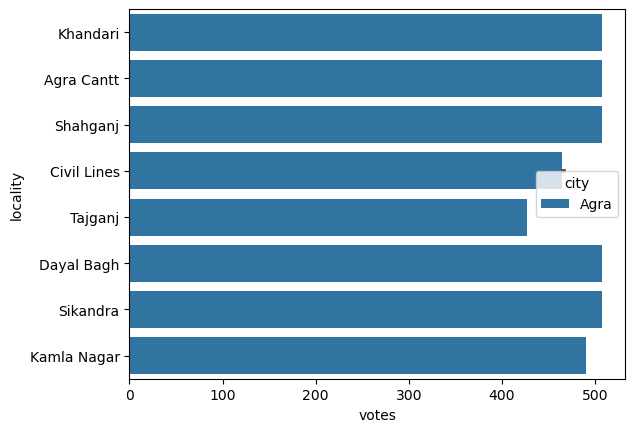

In [145]:
plt.figure9figsize=(25,7)
sns.barplot(x=df.votes.head(20),y=df.locality.head(20),hue=df.city.head(20),ci=True)

# Top Establishments

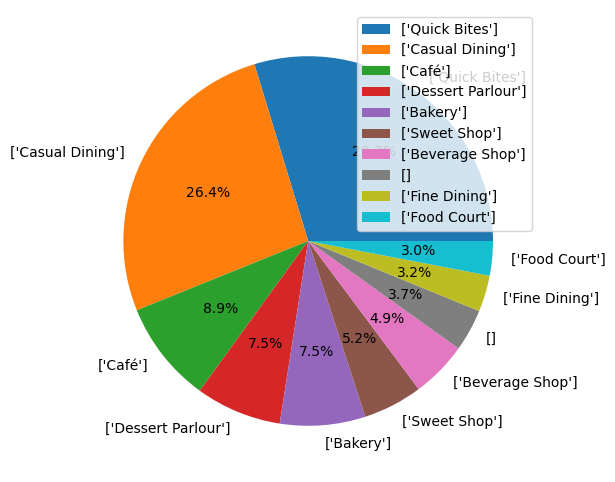

In [146]:
plt.figure(figsize=(12,6))
plt.pie(df.establishment.value_counts().head(10),labels=df.establishment.value_counts().head(10).index,autopct="%1.1f%%")
plt.legend()

Top Eastablishment= Quick Bites

# Aggregate Ratings of these Eastablishments

<Axes: xlabel='aggregate_rating', ylabel='establishment'>

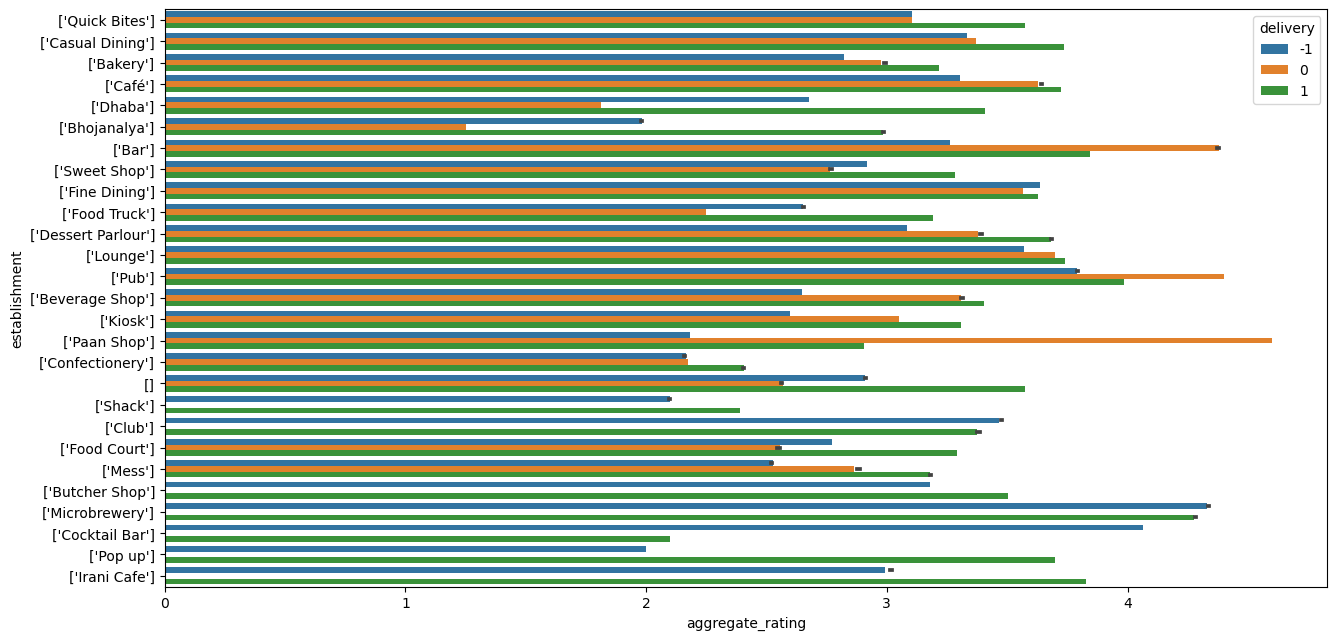

In [147]:
plt.figure(figsize=(15,7.5))
sns.barplot(x=df.aggregate_rating,y=df.establishment,hue=df.delivery,ci=True)

# Delhi Data Analysis 


In [314]:
Delhi=df[df.city=="New Delhi"]

In [315]:
Delhi

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,currency,highlights,aggregate_rating,rating_text,Discount,votes,photo_count,opentable_support,delivery,takeaway
53884,18895645,Plum By Bent Chair,['Casual Dining'],https://www.zomato.com/ncr/plum-by-bent-chair-...,"The Walk, Worldmark 2, Aerocity, New Delhi",New Delhi,1,Aerocity,28.551540,77.122704,...,Rs.,"['Debit Card', 'Dinner', 'Cash', 'Credit Card'...",4.9,Excellent,0.0,507.0,203.5,0.0,-1,-1
53885,18429148,Pa Pa Ya,['Fine Dining'],https://www.zomato.com/ncr/pa-pa-ya-saket-new-...,"Dome, Level 4, Select Citywalk, A-3, District ...",New Delhi,1,"Select Citywalk Mall, Saket",28.528391,77.218611,...,Rs.,"['Credit Card', 'Debit Card', 'Lunch', 'Serves...",4.7,Excellent,125.0,507.0,203.5,0.0,-1,-1
53886,18418277,Ministry Of Beer,['Lounge'],https://www.zomato.com/ncr/ministry-of-beer-co...,"M 44, Outer Circle, Connaught Place, New Delhi",New Delhi,1,Connaught Place,28.633286,77.222787,...,Rs.,"['Lunch', 'Credit Card', 'Dinner', 'Cash', 'De...",4.5,Excellent,75.0,507.0,203.5,0.0,-1,-1
53887,18625812,Detroit,['Bar'],https://www.zomato.com/ncr/detroit-connaught-p...,"F40, 2nd Floor, Inner Circle, \nConnaught Plac...",New Delhi,1,Connaught Place,28.631357,77.220251,...,Rs.,"['Lunch', 'Serves Alcohol', 'Takeaway Availabl...",4.6,Excellent,75.0,507.0,203.5,0.0,-1,-1
53888,18423151,The Darzi Bar & Kitchen,['Casual Dining'],https://www.zomato.com/TheDarziBar?utm_source=...,"H 55, 1st Floor, Outer Circle, Connaught Place...",New Delhi,1,Connaught Place,28.635508,77.219096,...,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.3,Very Good,75.0,507.0,203.5,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58538,310776,Gastronomica Kitchen & Bar,['Bar'],https://www.zomato.com/ncr/gastronomica-kitche...,"M-55, 2nd Floor, M Block Market, Greater Kaila...",New Delhi,1,"M Block Market, Greater Kailash 1 (GK1)",28.550421,77.235138,...,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Takeaway ...",4.6,Harika,100.0,507.0,203.5,0.0,1,-1
58546,18168125,Informal by Imperfecto,['Lounge'],https://www.zomato.com/ncr/informal-by-imperfe...,"52, Tolstoy Lane, Near Connaught Place, Janpat...",New Delhi,1,Janpath,28.627185,77.220571,...,Rs.,"['Cash', 'Credit Card', 'Debit Card', 'Dinner'...",3.9,Good,60.0,507.0,203.5,0.0,-1,-1
58550,18281985,Teddy Boy,['Lounge'],https://www.zomato.com/ncr/teddy-boy-connaught...,"N-86, 1st Floor, Outer Circle, Connaught Place...",New Delhi,1,Connaught Place,28.630120,77.219603,...,Rs.,"['Cash', 'Dinner', 'Debit Card', 'Lunch', 'Cre...",4.2,Very Good,100.0,507.0,203.5,0.0,-1,-1
58565,18500611,Sixth Empirica,['Casual Dining'],https://www.zomato.com/ncr/sixth-empirica-punj...,"Building 6, 2nd & 3rd Floor, NWA, Punjabi Bagh...",New Delhi,1,Punjabi Bagh,28.666524,77.123032,...,Rs.,"['Lunch', 'Debit Card', 'Dinner', 'Cash', 'Cre...",4.2,Very Good,75.0,507.0,203.5,0.0,-1,-1


In [316]:
px.bar(x=Delhi.name.head(15),y=Delhi.average_cost_for_two.head(15),text=Delhi.aggregate_rating.head(15),color=Delhi.delivery.head(15))

The average cost for two in Hauz Khas Social with the most ratings of 4.8 is Rs1200 and home delivery is also available 

In [317]:
Delhi.aggregate_rating.max()

4.9

In [318]:
Delhi[Delhi.aggregate_rating==4.9]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,currency,highlights,aggregate_rating,rating_text,Discount,votes,photo_count,opentable_support,delivery,takeaway
53884,18895645,Plum By Bent Chair,['Casual Dining'],https://www.zomato.com/ncr/plum-by-bent-chair-...,"The Walk, Worldmark 2, Aerocity, New Delhi",New Delhi,1,Aerocity,28.551540,77.122704,...,Rs.,"['Debit Card', 'Dinner', 'Cash', 'Credit Card'...",4.9,Excellent,0.0,507.0,203.5,0.0,-1,-1
53926,18607069,Chili's Grill & Bar,['Casual Dining'],https://www.zomato.com/ncr/chilis-grill-bar-ta...,"S 8 & 9, 2nd Floor, Pacific Mall, Tagore Garde...",New Delhi,1,"Pacific Mall, Tagore Garden",28.642270,77.106436,...,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'Debit...",4.9,Excellent,100.0,507.0,203.5,0.0,1,-1
53927,4751,Chili's Grill & Bar,['Casual Dining'],https://www.zomato.com/ncr/chilis-grill-bar-va...,"3rd Floor, Ambience Mall, Nelson Madela Road, ...",New Delhi,1,"Ambience Mall, Vasant Kunj",28.540954,77.154802,...,Rs.,"['Credit Card', 'Dinner', 'Takeaway Available'...",4.9,Excellent,100.0,507.0,203.5,0.0,1,-1
54079,18896889,Dragonfly Experience,['Cocktail Bar'],https://www.zomato.com/ncr/dragonfly-experienc...,"Worldmark 1, Aerocity, New Delhi",New Delhi,1,"Worldmark 1, Aerocity",28.550590,77.122990,...,Rs.,"['Lunch', 'Credit Card', 'Dinner', 'Cash', 'De...",4.9,Excellent,200.0,349.0,203.5,0.0,-1,-1
55792,19062617,Xero Degrees,['Café'],https://www.zomato.com/ncr/xero-degrees-vijay-...,"G-18B, Hudson Lane, Vijay Nagar, New Delhi",New Delhi,1,Vijay Nagar,28.694923,77.203577,...,Rs.,"['Lunch', 'Takeaway Available', 'Debit Card', ...",4.9,Excellent,37.5,182.0,203.5,0.0,-1,-1
55822,19062617,Xero Degrees,['Café'],https://www.zomato.com/ncr/xero-degrees-vijay-...,"G-18B, Hudson Lane, Vijay Nagar, New Delhi",New Delhi,1,Vijay Nagar,28.694923,77.203577,...,Rs.,"['Lunch', 'Takeaway Available', 'Debit Card', ...",4.9,Excellent,37.5,182.0,203.5,0.0,1,-1
57828,18895645,Plum By Bent Chair,['Casual Dining'],https://www.zomato.com/ncr/plum-by-bent-chair-...,"The Walk, Worldmark 2, Aerocity, New Delhi",New Delhi,1,Aerocity,28.551540,77.122704,...,Rs.,"['Debit Card', 'Dinner', 'Cash', 'Credit Card'...",4.9,Excellent,0.0,507.0,203.5,0.0,-1,-1
57872,18607069,Chili's Grill & Bar,['Casual Dining'],https://www.zomato.com/ncr/chilis-grill-bar-ta...,"S 8 & 9, 2nd Floor, Pacific Mall, Tagore Garde...",New Delhi,1,"Pacific Mall, Tagore Garden",28.642270,77.106436,...,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'Debit...",4.9,Excellent,100.0,507.0,203.5,0.0,-1,-1
57875,4751,Chili's Grill & Bar,['Casual Dining'],https://www.zomato.com/ncr/chilis-grill-bar-va...,"3rd Floor, Ambience Mall, Nelson Madela Road, ...",New Delhi,1,"Ambience Mall, Vasant Kunj",28.540954,77.154802,...,Rs.,"['Credit Card', 'Dinner', 'Takeaway Available'...",4.9,Excellent,100.0,507.0,203.5,0.0,-1,-1
58134,18983449,ABB - Andrea's Bar And Brasserie,['Casual Dining'],https://www.zomato.com/ncr/abb-andreas-bar-and...,"Shop 12, Middle Lane, Khan Market, New Delhi",New Delhi,1,Khan Market,28.600624,77.227395,...,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",4.9,Excellent,100.0,332.0,203.5,0.0,-1,-1


In [319]:
Delhi.locality.value_counts()

locality
Connaught Place                       128
Rajouri Garden                         56
Rohini                                 48
Punjabi Bagh                           47
Delhi University-GTB Nagar             38
                                     ... 
 Vardhaman Crown Mall                   1
JMD Kohinoor Mall, Greater Kailash      1
Basant Lok Market, Vasant Vihar         1
Spark Mall, Kamla Nagar                 1
West Gate Mall, Rajouri Garden          1
Name: count, Length: 257, dtype: int64

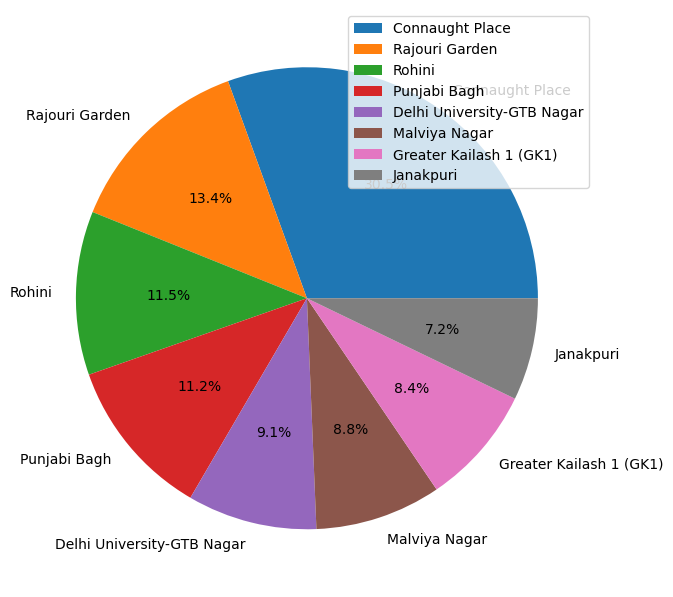

In [320]:
plt.figure(figsize=(15,7.5))
plt.pie(Delhi.locality.value_counts().head(8),labels=Delhi.locality.value_counts().head(8).index,autopct="%1.1f%%")
plt.legend()

Connaught Place has most number of restaurants in Delhi

In [321]:
Delhi.cuisines.value_counts()

cuisines
North Indian                                               133
Street Food                                                 46
Desserts, Ice Cream, Beverages                              41
Paan                                                        40
North Indian, Chinese                                       34
                                                          ... 
Cafe, Italian, Continental, Healthy Food, Pizza, Coffee      1
Cafe, Continental, European                                  1
Cafe, American, Italian                                      1
Cafe, Mediterranean, Sushi                                   1
North Indian, South Indian, Chinese, Fast Food               1
Name: count, Length: 695, dtype: int64

In [322]:
plt.figure(figsize=(45,5))
px.bar(Delhi.name.head(10),y=Delhi.average_cost_for_two.head(10),text=Delhi.aggregate_rating.head(10),color=Delhi.cuisines.head(10),template="plotly_dark")

<Figure size 4500x500 with 0 Axes>

In [323]:
a=Delhi[Delhi.cuisines=="North Indian"]

In [324]:
a

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,currency,highlights,aggregate_rating,rating_text,Discount,votes,photo_count,opentable_support,delivery,takeaway
53901,310470,Moolchand Parantha,[],https://www.zomato.com/ncr/moolchand-parantha-...,"Moolchand Metro Station, Lajpat Nagar 4, New D...",New Delhi,1,Lajpat Nagar 4,28.564135,77.234348,...,Rs.,"['Cash', 'Takeaway Available', 'No Seating Ava...",4.2,Very Good,15.0,507.0,203.5,0.0,-1,-1
53906,302424,Janta Eating House,['Quick Bites'],https://www.zomato.com/ncr/janta-eating-house-...,"Loni Road, Shahdara, New Delhi",New Delhi,1,Shahdara,28.682230,77.292380,...,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'Dinne...",4.1,Very Good,7.5,507.0,45.0,0.0,-1,-1
53914,308969,Shree Gopal Ji Chole Bhature,[],https://www.zomato.com/ncr/shree-gopal-ji-chol...,"Flat 148, Pocket 7, Rohini, New Delhi",New Delhi,1,Rohini,28.700392,77.102034,...,Rs.,"['Lunch', 'Delivery', 'Cash', 'Takeaway Availa...",4.3,Very Good,10.0,507.0,117.0,0.0,-1,-1
53924,6574,Pandit Ji Paranthe Wale,['Quick Bites'],https://www.zomato.com/ncr/pandit-ji-paranthe-...,"Shop 14, Ashok Vihar Phase 2, New Delhi",New Delhi,1,Ashok Vihar Phase 2,28.696565,77.179951,...,Rs.,"['Lunch', 'Takeaway Available', 'No Alcohol Av...",4.0,Very Good,10.0,507.0,188.0,0.0,-1,-1
53970,6075,Sita Ram Diwan Chand,['Quick Bites'],https://www.zomato.com/ncr/sita-ram-diwan-chan...,"2246, Near Imperial Cinema, Paharganj, New Delhi",New Delhi,1,Paharganj,28.642408,77.210479,...,Rs.,"['Cash', 'Takeaway Available', 'Breakfast', 'D...",4.1,Very Good,10.0,507.0,203.5,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58261,18610363,UK Chicken,['Quick Bites'],https://www.zomato.com/ncr/uk-chicken-rajouri-...,"C 1, Shop 5, Near Ramesh Nager Metro Station, ...",New Delhi,1,Rajouri Garden,28.614040,77.076348,...,Rs.,"['Lunch', 'Debit Card', 'Cash', 'Delivery', 'T...",2.3,Poor,40.0,48.0,66.0,0.0,-1,-1
58274,18273527,Bajaj Vaishno Dhaba,['Dhaba'],https://www.zomato.com/ncr/bajaj-vaishno-dhaba...,"117, Amrit Kaur Market, Opposite New Delhi Rai...",New Delhi,1,Paharganj,28.642217,77.218356,...,Rs.,"['Cash', 'No Alcohol Available', 'Lunch', 'Tak...",2.3,Poor,20.0,20.0,3.0,0.0,-1,-1
58289,7788,Punjabi Rasoi,['Quick Bites'],https://www.zomato.com/ncr/punjabi-rasoi-ina?u...,"Dilli Haat, INA, New Delhi",New Delhi,1,"Dilli Haat, INA",28.573095,77.206154,...,Rs.,"['Dinner', 'Cash', 'Lunch', 'Takeaway Availabl...",2.4,Poor,35.0,50.0,32.0,0.0,-1,-1
58292,305606,Zustt Yummy,['Quick Bites'],https://www.zomato.com/zusttyummyrestaurant?ut...,"70 B, LGF, Safdarjung Enclave, Safdarjung, New...",New Delhi,1,Safdarjung,28.564978,77.198894,...,Rs.,"['Cash', 'Takeaway Available', 'No Alcohol Ava...",2.4,Poor,20.0,50.0,22.0,0.0,-1,-1


In [325]:
a.name.value_counts().head(10)

name
Moolchand Parantha          2
Kheer - Roseate House       2
Janta Eating House          2
Ashok & Ashok Meat Dhaba    2
Delhi Belly Dhaba (DBD)     2
Sita Ram Diwan Chand        2
Pandit Ji Paranthe Wale     2
Shri Ganesh Bhojnalya       1
Rimal Bhojanalya            1
Sharma Bhojnalaya           1
Name: count, dtype: int64

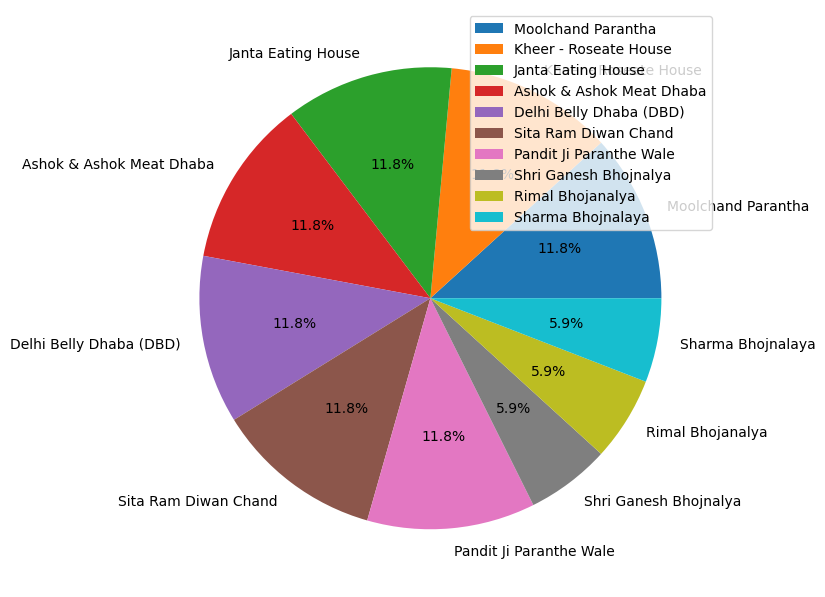

In [326]:
plt.figure(figsize=(15,7.5))
plt.pie(a.name.value_counts().head(10),labels=a.name.value_counts().head(10).index,autopct="%1.1f%%")
plt.legend()

In [327]:
plt.figure(figsize=(12,6))
px.bar(x=a.name.head(10),y=a.average_cost_for_two.head(10),text=a.aggregate_rating.head(10),color=a.delivery.head(10),)


<Figure size 1200x600 with 0 Axes>

Average cost for two in Delhi for North Indian Cuisine is Rs1200 and the best restaurant offering North Indian in Delhi with the ratings og 4.3 is kheer-Roseate House

In [ ]:
6. Analyze Competitor Landscape:
Understanding the strengths and weaknesses of competitors, especially those with similar 
ratings, can help restaurants identify areas for improvement and differentiation
 For those seeking an authentic North Indian culinary experience in Delhi, we 
recommend exploring the offerings of [highlighted restaurants].
 Considerations for budget-friendly options and premium dining experiences can be 
tailored based on individual preferences and expectations.
 [Include any specific recommendations for different types of North Indian dining 
experiences, considering price sensitivity and desired ambiance.]